In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston=load_boston()

In [3]:
data=boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
key=boston.keys()

In [5]:
key

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
features=pd.DataFrame(data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=["Target"])

In [7]:
data=pd.concat([features,target],axis=1)

In [8]:
correlation=data.corr("pearson")

In [9]:
abs(correlation['Target']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

In [10]:
X1=data["RM"]
Y=data["Target"]
X2=data["LSTAT"]

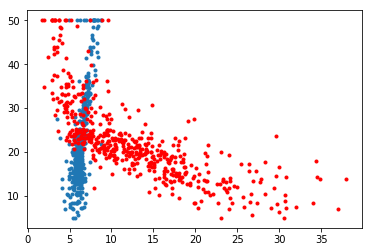

In [11]:
plt.plot(X1,Y,'.',
        X2,Y,'r.')

In [12]:
X1=(X1-X1.min())/(X1.max()-X1.min())
Y=(Y-Y.min())/(Y.max()-Y.min())
X2=(X2-X2.min())/(X2.max()-X2.min())

In [13]:
x1=np.array(X1)
x2=np.array(X2)
y=np.array(Y)

In [14]:
x1_train,x1_test,x2_train,x2_test,y_train,y_test=train_test_split(x1,x2,y,test_size=0.2)

In [15]:
len(x1_train)

404

In [16]:
len(x1_test)

102

In [17]:
def hypothesis(a,x1,b,x2,c):
    return a*x1+b*np.power(x2,2)+c #ax1+b(x2)2+c

In [18]:
def error(a,x1,b,x2,c,y):
    e=0
    m=len(x1)
    
    for i in range(m):
        e += np.power((hypothesis(a,x1[i],b,x2[i],c)-y[i]),2)
        
    return (1/(2*m))*e

In [19]:
def step_gradient(a,x1,b,x2,c,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x1)
    
    for i in range(m):
        grad_a +=(1/m)*(hypothesis(a,x1[i],b,x2[i],c)-y[i])*x1[i]
        grad_b +=(1/m)*(hypothesis(a,x1[i],b,x2[i],c)-y[i])*(np.power(x2[i],2))
        grad_c +=(1/m)*(hypothesis(a,x1[i],b,x2[i],c)-y[i])
        
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    
    return a,b,c

In [20]:
def descend(init_a,x1,init_b,x2,init_c,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    
    for i in range(iterations):
        e=error(a,x1,b,x2,c,y)
        
        if i%1000==0:
            print(f"Error:{np.sqrt(e)},a:{a},b:{b},c:{c}")
    
        a,b,c=step_gradient(a,x1,b,x2,c,y,learning_rate)
        
    return a,b,c

In [21]:
a=0.35639504224044527
b=-0.22171598618595886
c=0.23560511954684552
learning_rate=0.001
iterations=10000

In [22]:
final_a, final_b, final_c = descend(a,x1_train,b,x2_train,c,y_train,learning_rate,iterations)

Error:0.11149830273555117,a:0.35639504224044527,b:-0.22171598618595886,c:0.23560511954684552
Error:0.11065650645789454,a:0.36260848014722247,b:-0.23229999754032846,c:0.2297147412540554
Error:0.10991897180946868,a:0.36978205776161244,b:-0.24221577535955666,c:0.22614275871941655
Error:0.1092290588707797,a:0.3770709841687855,b:-0.25168706718152795,c:0.2232552747396123
Error:0.10858022316116094,a:0.3842469024744055,b:-0.26078464077016833,c:0.22059992710875084
Error:0.10796986745888251,a:0.3912514473379506,b:-0.2695367293788914,c:0.21805053721403378
Error:0.10739579637752654,a:0.39807301918993415,b:-0.27795952837469073,c:0.2155710062830267
Error:0.10685594167434914,a:0.4047127756041283,b:-0.2860656233222607,c:0.21315014230771548
Error:0.10634833834731122,a:0.411175249056209,b:-0.2938663261556728,c:0.2107836689293348
Error:0.10587111985755646,a:0.41746576211685693,b:-0.30137232946996284,c:0.20846925798499272


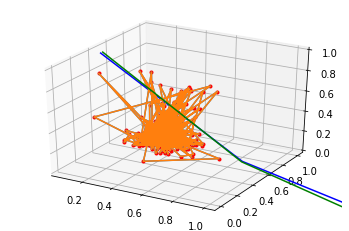

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train,x2_train,y_train, 'r.',
        x1_train,x2_train, hypothesis(a,x1_train,b,x2_train,c),'b',
        x1_train,x2_train, hypothesis(final_a,x1_train,final_b,x2_train,final_c),'g')

In [27]:
y_test[:3]

array([0.5       , 0.07555556, 0.25777778])

In [28]:
hypothesis(final_a,x1_test[:3],final_b,x2_test[:3],final_c)

array([0.39675905, 0.36731991, 0.33813014])

In [29]:
np.sqrt(error(final_a,x1_test,final_b,x2_test,final_c,y_test))

0.10216767698488595

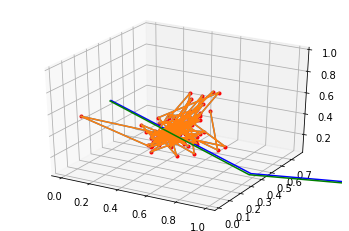

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_test,x2_test,y_test, 'r.',
        x1_test,x2_test, hypothesis(a,x1_test,b,x2_test,c),'b',
        x1_test,x2_test, hypothesis(final_a,x1_test,final_b,x2_test,final_c),'g')